# CCT College Dublin

## Assessment Cover Page

**Module Title**: Machine Learning for AI  
**Assessment Title**: ML_CA1  
**Lecturer Name**: David McQuaid  
**Student Full Name**: Ingrid Menezes Castro  
**Student Number**: 2020341  
**Assessment Due Date**: 31/05/2024  
**Date of Submission**: 31/05/2024  

**GITHUB LINK**: https://github.com/IC2020341/IngridCastro_ML_CA2

## Declaration

<div style="border: 1px solid black; padding: 10px;">
By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.
</div>

-------------

In [106]:
# Imports
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


# Data Preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler


# NN
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.models import Sequential


# RegressionAlgorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor


# Other
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score

#--------#---------#

#visualisation
from wordcloud import WordCloud

# Sentiment Analysis
from textblob import TextBlob
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
# Instalations
#nltk.download("stopwords")
#nltk.download('punkt')
#!pip install langdetect

-----------

# Summary

**1. Neural Networks**
- 1.1. Data Understanding
- 1.2. Data Visualisation
- 1.3. Data Preparation
- 1.4. Neural Networks to predict Income
- 1.5. Regression Algorithms comparison
- 1.6. RandomForestRegressor: Optimization and prediction of Income
- 1.7. Prediction of a New Customer

**2. Semantic Analysis**
- 2.1. Data Understanding
- 2.2. Data Preparation
- 2.3. Data Visualisation
- 2.4. Sentiment Analysis (with Visualisations)
- 2.5. Comparison between Ratings and Sentiment Analysis

------------

# 1. Neural Networks

## 1.1. Data Understanding

In this first part of the data analysis we try to understand what are we dealing with, search for missing/ duplicated/NA values and do some EDA

In [3]:
df1 = pd.read_csv("BankRecords.csv")

In [4]:
df1.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [5]:
df1.shape

(5000, 14)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [7]:
df1.describe()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [8]:
df1.isnull().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

In [9]:
df1.nunique()

ID                       5000
Age                        45
Experience(Years)          47
Income(Thousands's)       162
Sort Code                 467
Family                      4
Credit Score              108
Education                   3
Mortgage(Thousands's)     347
Personal Loan               2
Securities Account          2
CD Account                  2
Online Banking              2
CreditCard                  2
dtype: int64

In [10]:
df1.duplicated().sum()

0

In [11]:
df1.isna().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

## 1.2. Data Visualisations

For the initial data visualisations I have chosen to do histograms for the numerical variables and countplot for the categorical ones. Additionally I chose to have a look at the pairplots to see their relashionship with the dependent variable. 

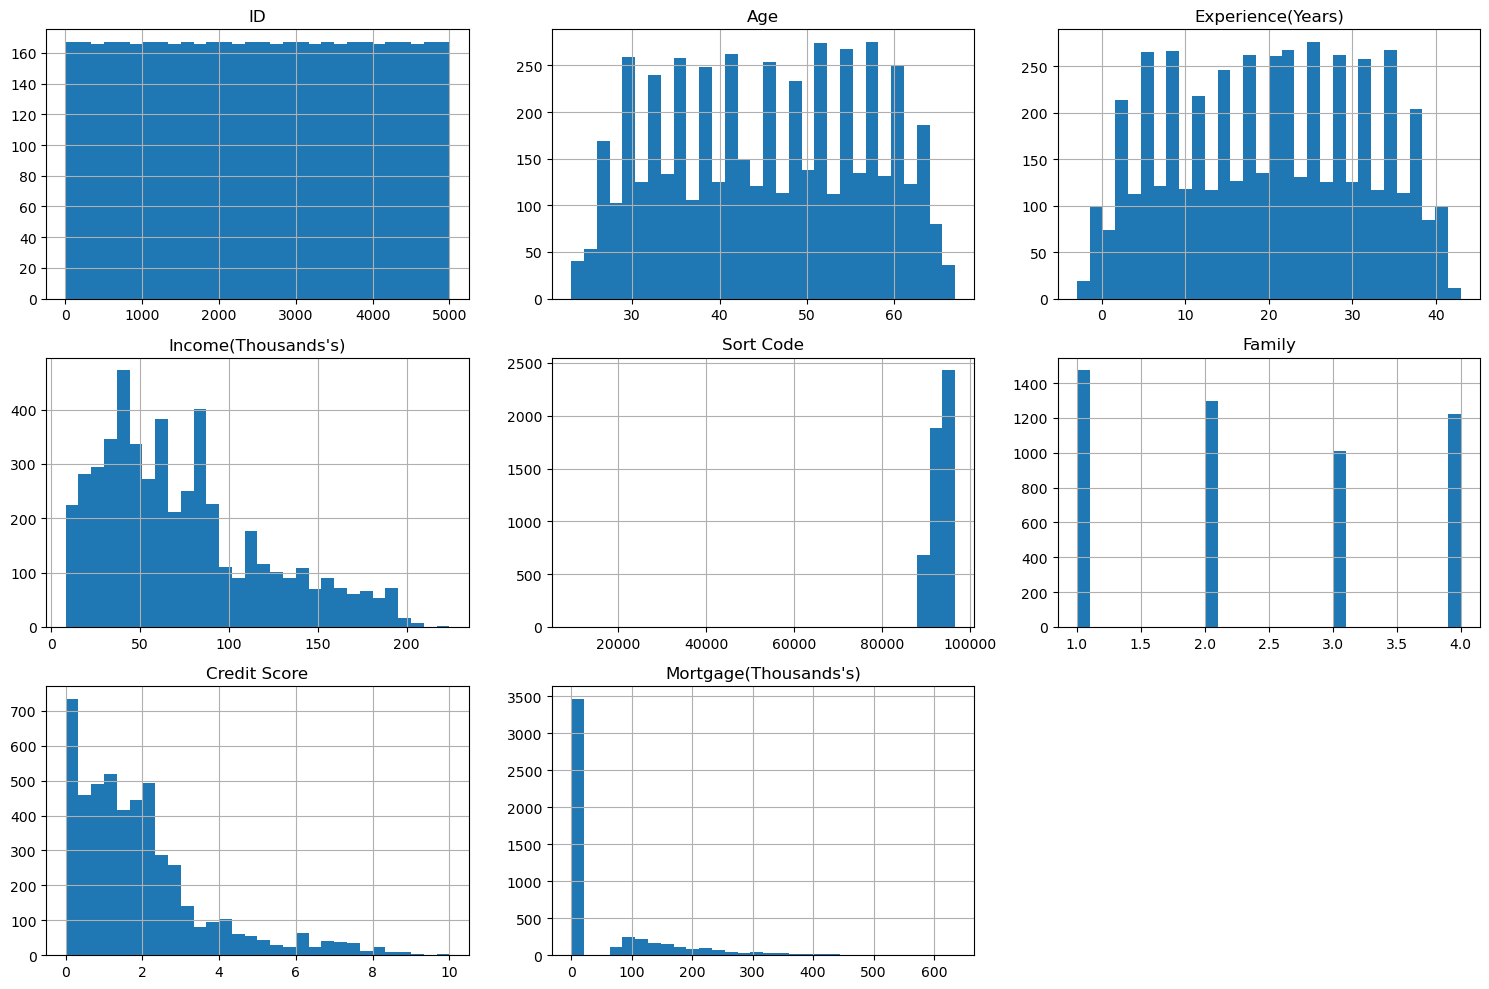

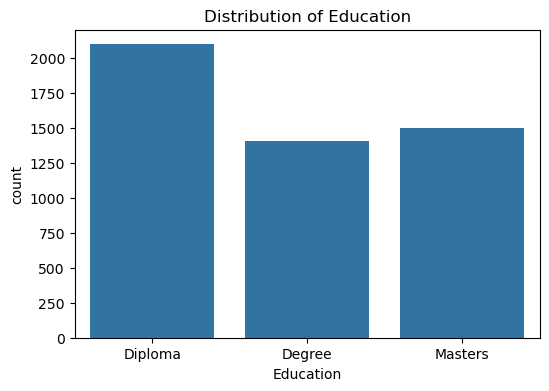

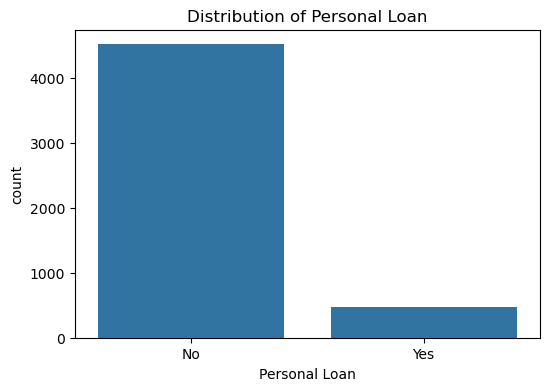

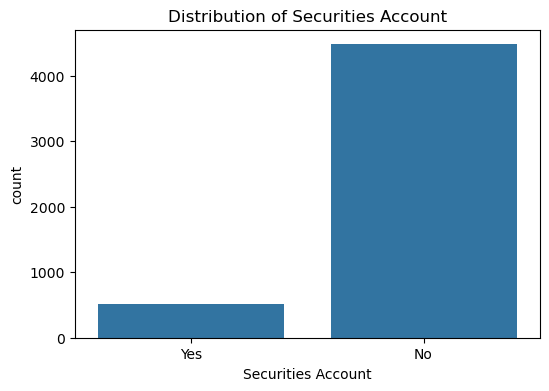

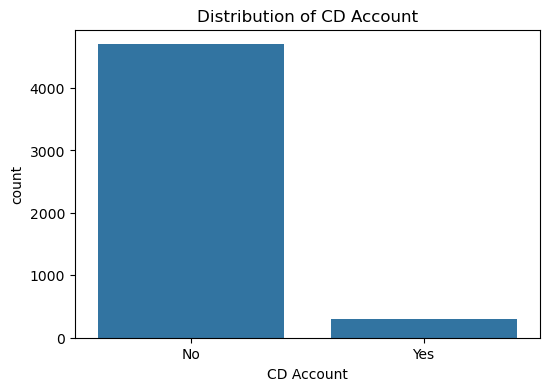

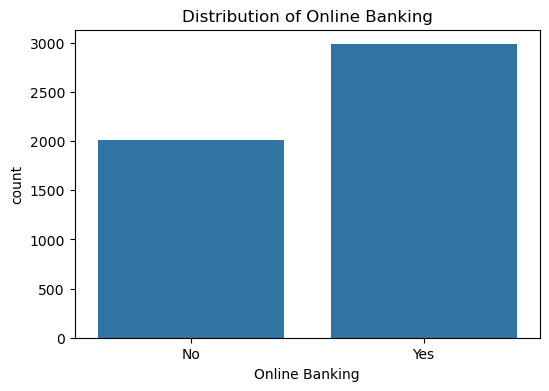

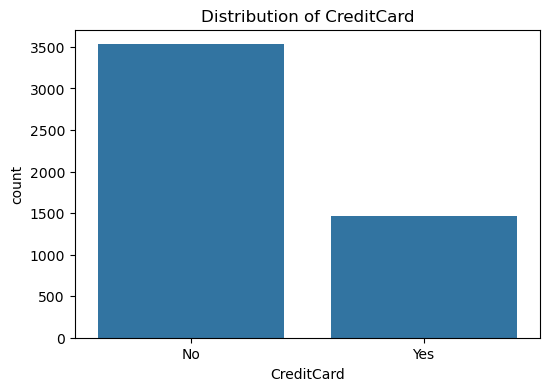

In [12]:
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df1.select_dtypes(include=['object', 'bool', 'category']).columns

df1[numeric_columns].hist(bins=30, figsize=(15, 10), layout=(len(numeric_columns)//3+1, 3))
plt.tight_layout()
plt.show()

for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=df1)
    plt.title(f'Distribution of {column}')
    plt.show()

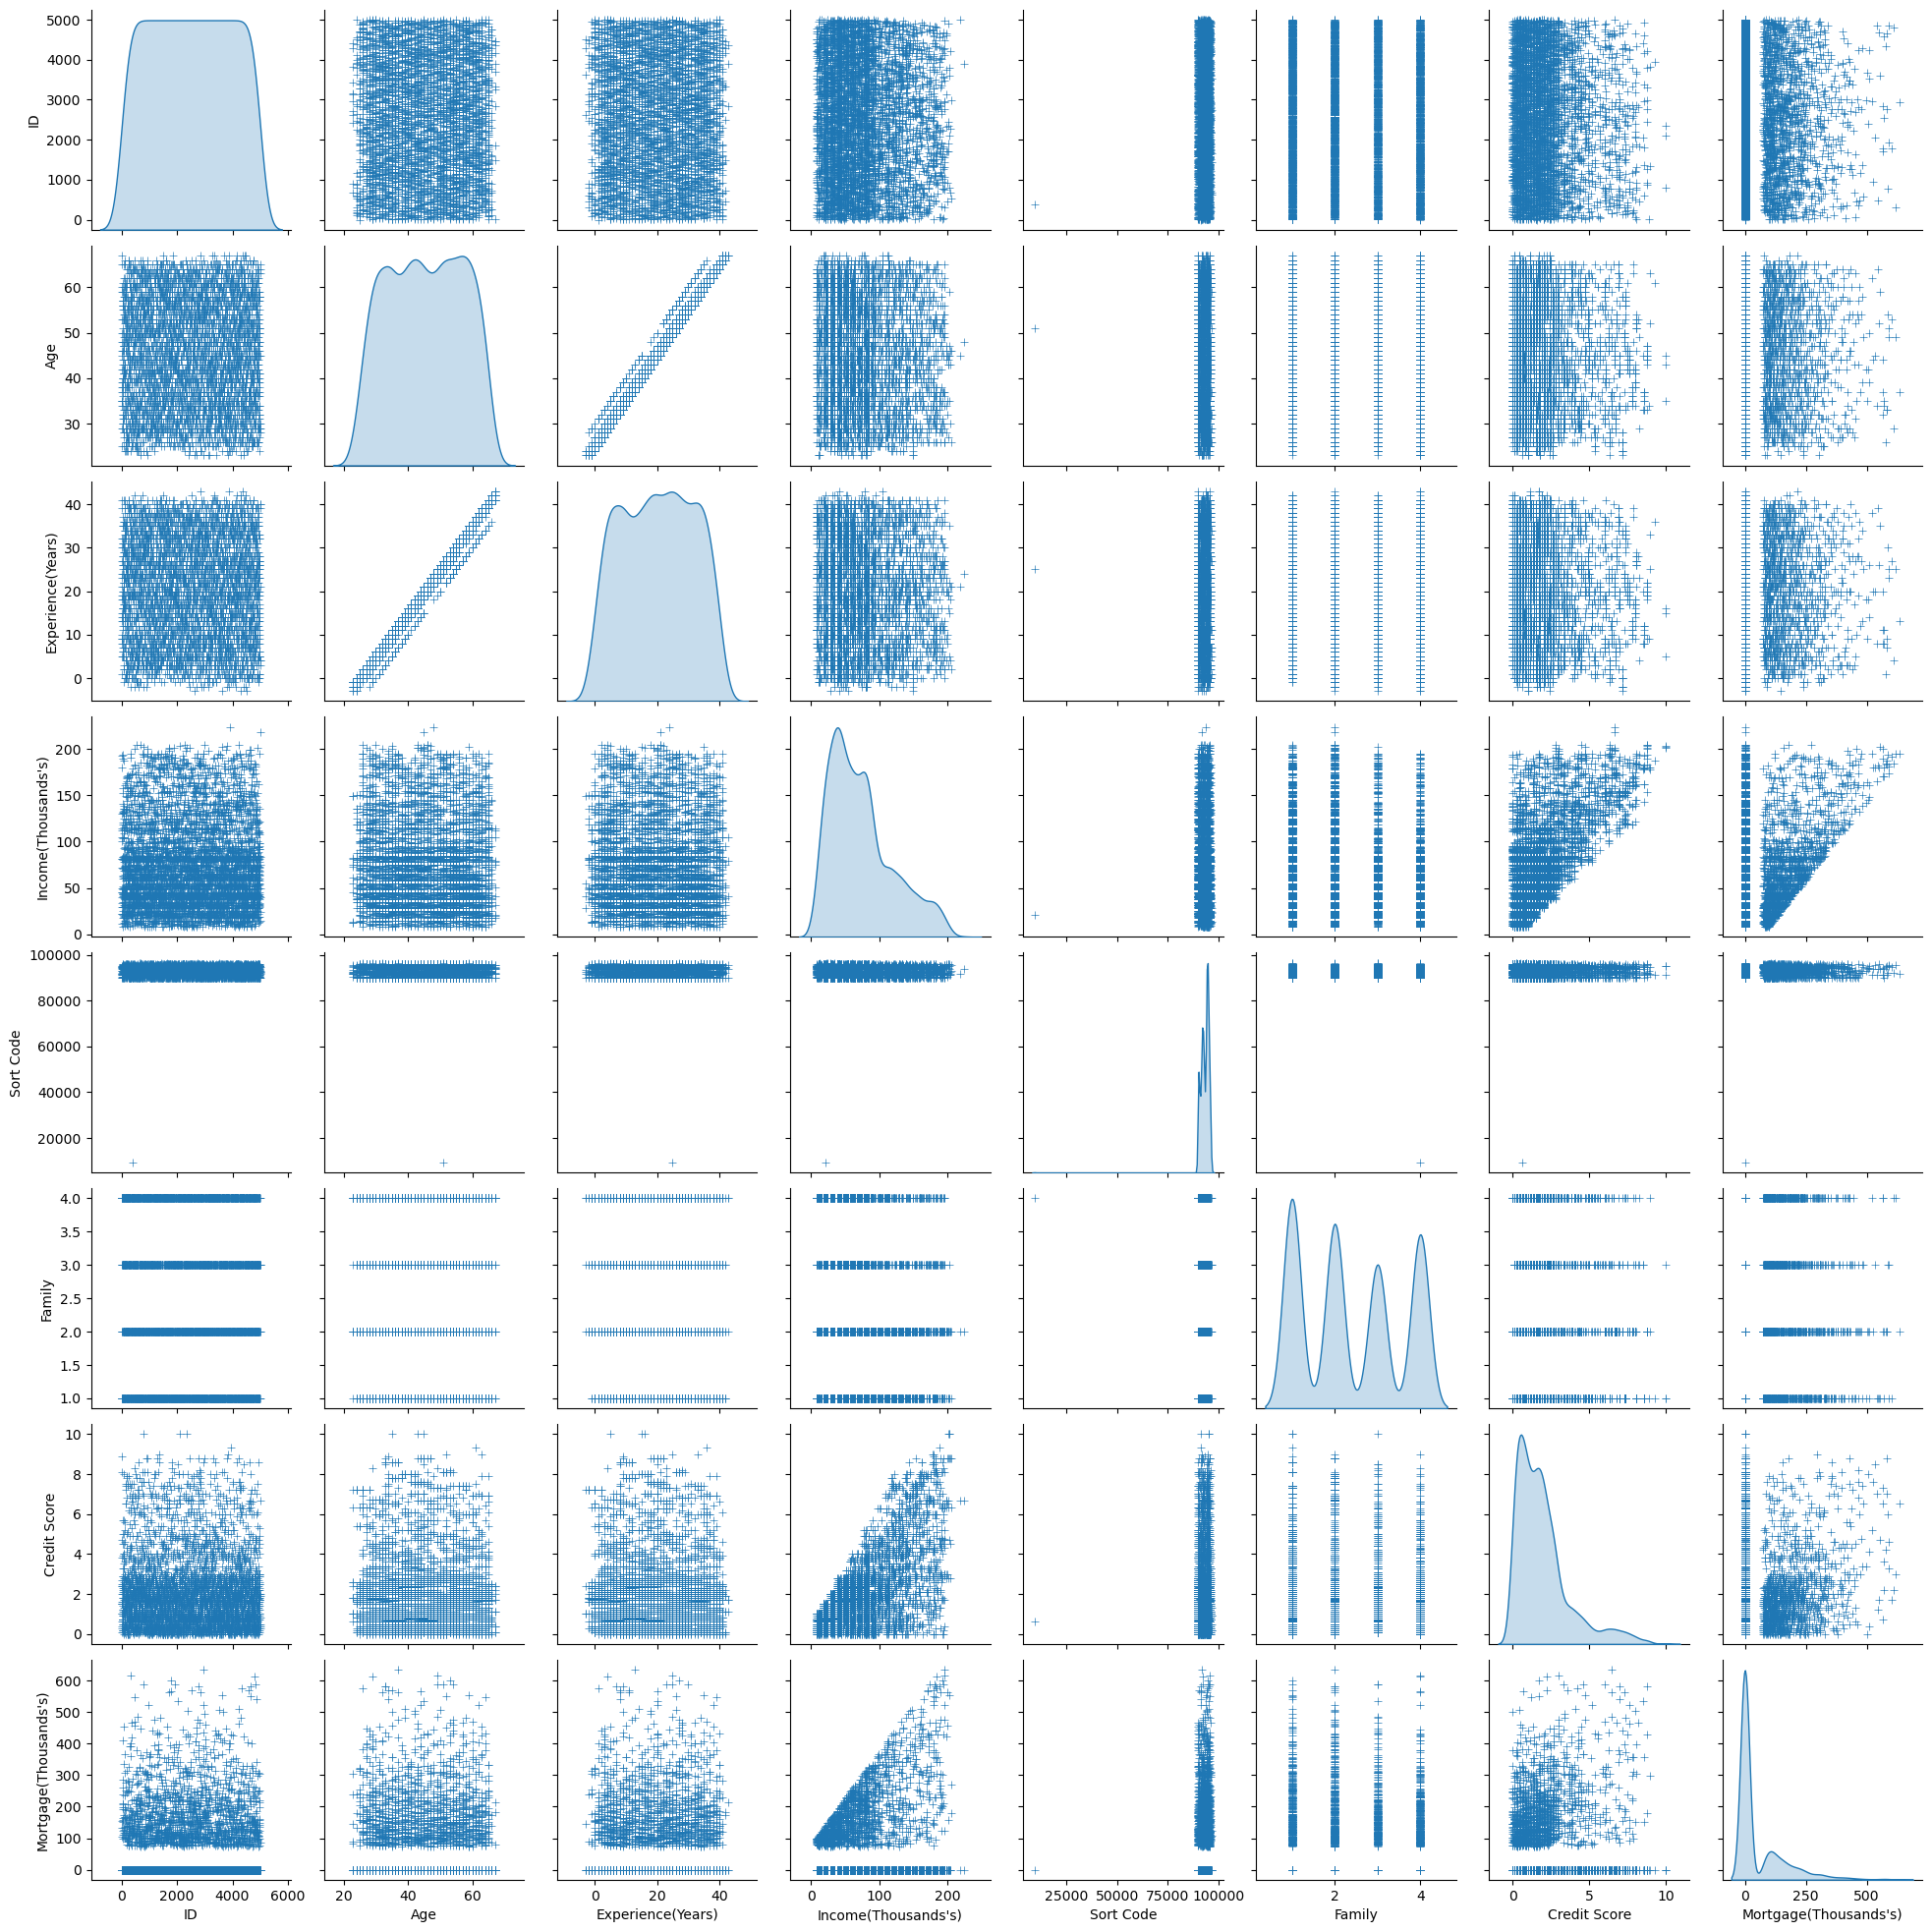

In [13]:
sns.pairplot(df1, diag_kind='kde', markers='+')

In [14]:
age_counts = df1['Age'].value_counts().sort_index(ascending=True)
age_counts

Age
23     12
24     28
25     53
26     78
27     91
28    103
29    123
30    136
31    125
32    120
33    120
34    134
35    151
36    107
37    106
38    115
39    133
40    125
41    136
42    126
43    149
44    121
45    127
46    127
47    113
48    118
49    115
50    138
51    129
52    145
53    112
54    143
55    125
56    135
57    132
58    143
59    132
60    127
61    122
62    123
63    108
64     78
65     80
66     24
67     12
Name: count, dtype: int64

Observation: There are negative values for Experience(Years) as should be seen below. This should be treated when Scaling the data.

In [15]:
experience_counts = df1['Experience(Years)'].value_counts().sort_index(ascending=True)
experience_counts

Experience(Years)
-3       4
-2      15
-1      33
 0      66
 1      74
 2      85
 3     129
 4     113
 5     146
 6     119
 7     121
 8     119
 9     147
 10    118
 11    116
 12    102
 13    117
 14    127
 15    119
 16    127
 17    125
 18    137
 19    135
 20    148
 21    113
 22    124
 23    144
 24    131
 25    142
 26    134
 27    125
 28    138
 29    124
 30    126
 31    104
 32    154
 33    117
 34    125
 35    143
 36    114
 37    116
 38     88
 39     85
 40     57
 41     43
 42      8
 43      3
Name: count, dtype: int64

## 1.3. Data preparation

In data preparation we need to do the following:
- Encode variables;
- Scale data;
- Prepare for modelling;

For the encoding of variables we need to transform the categorical variables in numerical so we can later scale, split etc. In the next cells we will label encoder the variables:
- Personal Loan;
- Securities Account;
- CD Account;
- Online Banking;
- and Credit Card;

These variables are expressed in 'Yes' or 'No' and we encoded Yes to be 1 and No to be 0.

In [16]:
label_encoder = LabelEncoder()
columns = ['Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']

for column in columns:
    df1[column] = label_encoder.fit_transform(df1[column])

In [17]:
df1.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Diploma,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Diploma,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Degree,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Degree,0,0,0,0,0,1


As you can see above the 'Education' variable is still categorical, so for this one we will apply dummies which will create three new columns:
- Education_Degree;
- Education_Diploma;
- Education_Masters;

On the next cell I have transformed the Boolean columns in INT32.

In [18]:
df1 = pd.get_dummies(df1, columns=['Education'])
df1.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard,Education_Degree,Education_Diploma,Education_Masters
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,False,True,False
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,False,True,False
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,False,True,False
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,True,False,False
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,True,False,False


In [19]:
boolean = ['Education_Degree', 'Education_Diploma', 'Education_Masters']
df1[boolean] = df1[boolean].astype(int)

In [20]:
df1.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard,Education_Degree,Education_Diploma,Education_Masters
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,1,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,1,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,1,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,1,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,1,0,0


In [21]:
df1.drop(columns=['Sort Code'], inplace=True)

In [22]:
df1.dtypes

ID                         int64
Age                        int64
Experience(Years)          int64
Income(Thousands's)        int64
Family                     int64
Credit Score             float64
Mortgage(Thousands's)      int64
Personal Loan              int32
Securities Account         int32
CD Account                 int32
Online Banking             int32
CreditCard                 int32
Education_Degree           int32
Education_Diploma          int32
Education_Masters          int32
dtype: object

In [23]:
df1['Credit Score'] = (df1['Credit Score'] * 10).astype(int)

In [24]:
df1.head()

,ID,Age,Experience(Years),Income(Thousands's),Family,Credit Score,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard,Education_Degree,Education_Diploma,Education_Masters
0,1,25,1,49,4,16,0,0,1,0,0,0,0,1,0
1,2,45,19,34,3,15,0,0,1,0,0,0,0,1,0
2,3,39,15,11,1,10,0,0,0,0,0,0,0,1,0
3,4,35,9,100,1,27,0,0,0,0,0,0,1,0,0
4,5,35,8,45,4,10,0,0,0,0,0,1,1,0,0


### Correlation Matrix

What can be noticed from the correlation matrix and the pairplots created is that most of the features hold negative correlation with 'Income(Thousands's)' and the only ones with some positive correlation are:

- Credit score;
- Mortgage(Thousands's);
- Personal Loan;
- CD Account;
- Education_Diploma;

Observation: Even though those features were the only ones that seems to have positive correlation with the dataset, the exclusion of the others variables (onto X - the independent variables) caused the predictions to not correspond to the true value of y. So, because of that, the correlation was not a sufficient factor to do a feature selection for our model. 

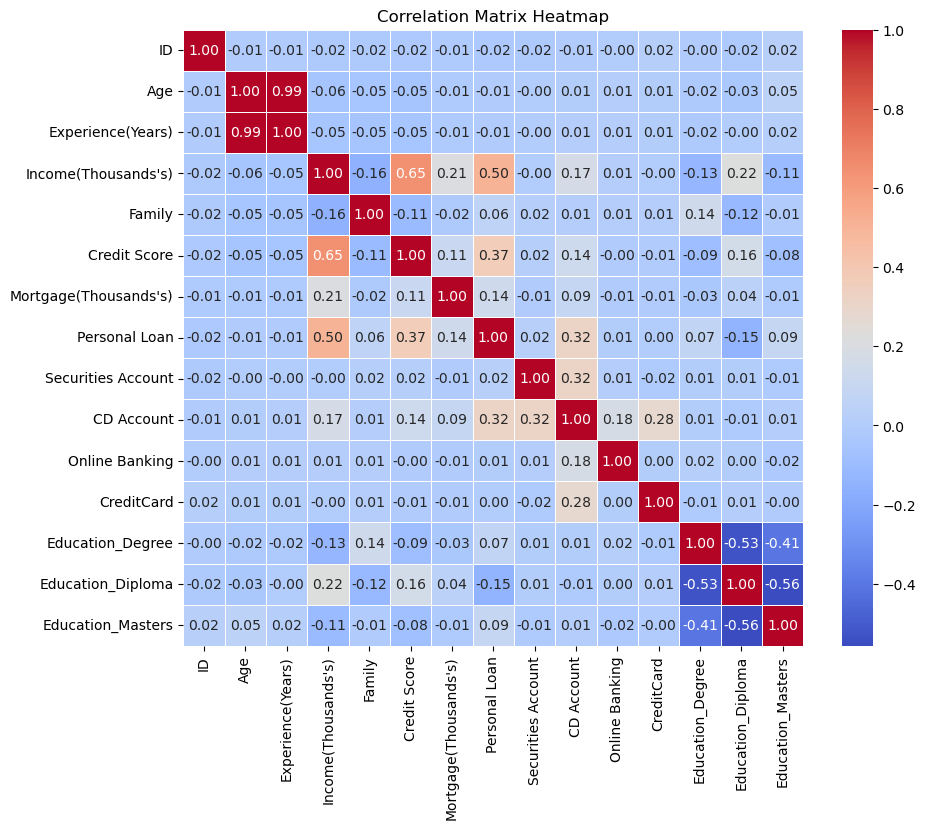

In [25]:
corr_matrix = df1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Data preparation for modelling and scaling

For scaling I will use the MinMaxScaler. The independent Variables (X) are all the other columns but 'Income(Thousands's)', while the dependent variable (y) is 'Income(Thousands's)'.

In [81]:
X = df1.iloc[:, np.r_[0:3, 4:15]]
y = df1.iloc[:, 3]

In [82]:
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

## 1.4. Neural Networks to predict Income

In [83]:
model = Sequential()
model.add(Dense(100, input_shape=(X.shape[1],), activation='relu'))
model.add(LeakyReLU(negative_slope=0.01))
model.add(Dense(150))
model.add(LeakyReLU(negative_slope=0.01))
model.add(Dense(50))
model.add(LeakyReLU(negative_slope=0.01))
model.add(Dense(50))
model.add(LeakyReLU(negative_slope=0.01))
model.add(Dense(1))

C:\Users\ingri\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.fit(X, y, epochs=600, batch_size=10, verbose=2)

Epoch 1/600
500/500 - 2s - 4ms/step - loss: 1675.9691 - mse: 1675.9691
Epoch 2/600
500/500 - 0s - 725us/step - loss: 929.6974 - mse: 929.6974
Epoch 3/600
500/500 - 0s - 748us/step - loss: 906.2913 - mse: 906.2913
Epoch 4/600
500/500 - 0s - 777us/step - loss: 878.9045 - mse: 878.9045
Epoch 5/600
500/500 - 0s - 775us/step - loss: 863.1445 - mse: 863.1445
Epoch 6/600
500/500 - 0s - 736us/step - loss: 843.7482 - mse: 843.7482
Epoch 7/600
500/500 - 0s - 746us/step - loss: 824.1406 - mse: 824.1406
Epoch 8/600
500/500 - 0s - 761us/step - loss: 803.8673 - mse: 803.8673
Epoch 9/600
500/500 - 0s - 751us/step - loss: 794.5095 - mse: 794.5095
Epoch 10/600
500/500 - 0s - 743us/step - loss: 769.8336 - mse: 769.8336
Epoch 11/600
500/500 - 0s - 738us/step - loss: 767.4236 - mse: 767.4236
Epoch 12/600
500/500 - 0s - 734us/step - loss: 760.9369 - mse: 760.9369
Epoch 13/600
500/500 - 0s - 734us/step - loss: 762.2931 - mse: 762.2931
Epoch 14/600
500/500 - 0s - 734us/step - loss: 768.1331 - mse: 768.1331
E

In [85]:
scores = model.evaluate(X,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 40.7253 - mse: 40.7253
compile_metrics: 4240.52%


In [86]:
y_pred_nn = model.predict(X)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step


In [87]:
print(y_pred_nn)

[[48.473125]
 [31.264927]
 [ 9.057388]
 ...
 [21.2038  ]
 [52.400913]
 [90.061134]]


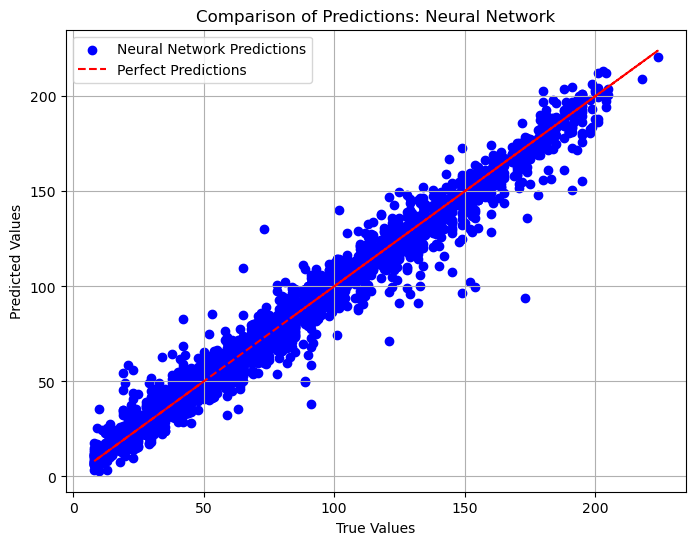

In [88]:
plt.figure(figsize=(8, 6))

plt.scatter(y, y_pred_nn, color='blue', label='Neural Network Predictions')

plt.plot(y, y, color='red', linestyle='--', label='Perfect Predictions')

plt.title('Comparison of Predictions: Neural Network')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

After multiple tunings and change of on layers, activation functions, optimizer and number os epochs, this was the configuration that worked best with the dataset.

The epoch numbers and batch sizes had a great influence in the overall precision of the predictions, as well as I found out that having relu and LeakyRelu was way more effective than having Sigmoid, for example, due to the ranges of relu and leaky relu being broader. The scaling also made a difference and I chose to do MinMaxScaler to get rid of a few negative values in 'Experience(Years)' detected earlier on in the data understanding phase.

The difference in the predictions didn't change much when I tested more epochs (700 and 1000), even when the overall MSE (Mean Squared Error) got smaller. I am using the MSE as metrics because as we are working with regression MSE is a better metric (M, Padhma. 2021). 

## 1.5. Regression Algorithms comparison

The first thing we need to do is to see which would be a better fit for this dataset. For that we should compare their efficiency and then optimise and tune our chosen algorithm. The code in this section has been used from the lessons learned in class (McQuaid, 2024).

I chose the StandardScaler in this case, because its use is more recommended 

### Data preparation

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [127]:
scaler = StandardScaler()

In [128]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model comparison

In [129]:
models = []

models.append(("DTR", DecisionTreeRegressor()))
models.append(("RFR", RandomForestRegressor()))
models.append(("LR", LinearRegression()))
models.append(("RDG", Ridge()))
models.append(("LSS", Lasso()))
models.append(("EN", ElasticNet()))
models.append(("GBR", GradientBoostingRegressor()))

In [130]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print('%s: Mean MSE = %f, Standard Deviation = %f' % (name, -cv_results.mean(), cv_results.std()))

DT: Mean MSE = 725.111000, Standard Deviation = 132.433964
RF: Mean MSE = 432.913252, Standard Deviation = 47.698762
LR: Mean MSE = 950.820277, Standard Deviation = 52.198007
RDG: Mean MSE = 950.307109, Standard Deviation = 52.228066
LSS: Mean MSE = 954.685956, Standard Deviation = 53.587240
EN: Mean MSE = 1038.723859, Standard Deviation = 52.589506
GBR: Mean MSE = 708.978764, Standard Deviation = 52.754973


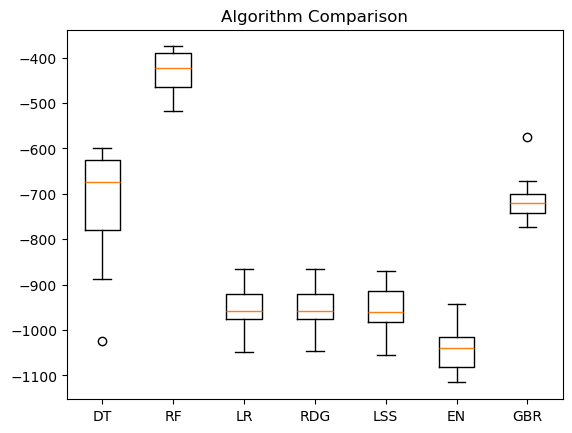

In [131]:
pyplot.boxplot(results, labels = names)
pyplot.title("Algorithm Comparison")
pyplot.show()

### Random Forest Regressor

The model that performed best was the Random Forest Regressor, so that will be optimized and later compared to the performance of our Neural Networks.

In [132]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [133]:
y_pred_RF_bo = model.predict(X_test) #model before optimisation

In [134]:
y_pred_RF_bo

array([ 84.47,  35.4 ,  50.75, 103.9 ,  69.25,  40.06,  45.32,  82.76,
        72.71,  81.93,  73.18,  52.84,  31.78,  36.61,  52.39,  46.54,
       165.63, 141.5 ,  73.52,  49.35,  24.99,  28.58,  52.99,  28.11,
       116.12,  59.31,  61.44, 109.95, 143.78, 128.45,  59.91,  75.37,
        40.21,  56.68, 160.02,  90.97,  47.97,  46.68,  75.76,  69.04,
       119.38,  32.23,  80.99,  47.61, 134.27,  37.58,  52.49,  34.96,
       131.95,  48.86,  68.51, 142.17,  83.07,  51.37,  13.33, 130.31,
        77.88,  44.51,  65.85,  53.81,  82.37,  57.42,  22.88,  31.45,
        26.83,  68.4 ,  38.43,  44.53,  61.87,  70.82,  55.99,  65.45,
        21.29, 130.49,  69.23, 100.82,  54.83,  75.84,  61.28,  20.98,
       119.47,  89.63,  74.17,  69.69,  60.23,  41.86, 167.65, 122.16,
       141.36,  44.9 ,  57.73,  70.27, 103.39, 152.55, 123.74,  75.27,
        22.9 ,  65.86, 111.66,  49.68,  46.78,  66.93, 132.15,  24.65,
        38.88,  68.65, 149.67, 162.85,  86.44,  76.3 ,  56.15,  89.16,
      

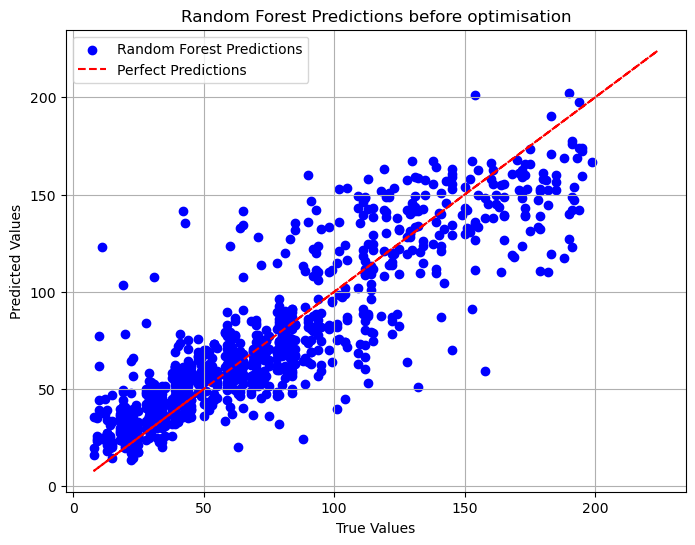

In [135]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_RF_bo, color='blue', label='Random Forest Predictions')

plt.plot(y, y, color='red', linestyle='--', label='Perfect Predictions')

plt.title('Random Forest Predictions before optimisation')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### 1.6. RandomForestRegressor: Optimization and prediction of Income

In [147]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

# Number of features to consider at every split
max_features = ['sqrt']

# Maximum number of levels in tree
max_depth = [2, 4, 6, 8, 10, 12]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 8]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]

# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['sqrt'], 'max_depth': [2, 4, 6, 8, 10, 12], 'min_samples_split': [2, 3, 4, 5, 8], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]}


In [148]:
rf_model = RandomForestRegressor()

rf_Grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 8],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [153]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 80}

In [154]:
train_mse = mean_squared_error(y_train, rf_Grid.predict(X_train))

test_mse = mean_squared_error(y_test, rf_Grid.predict(X_test))

print(f'Train MSE: {train_mse:.5f}')
print(f'Test MSE: {test_mse:.5f}')

Train MSE: 303.59764
Test MSE: 594.78016


In [155]:
y_pred_RF_opt = rf_Grid.predict(X_test)

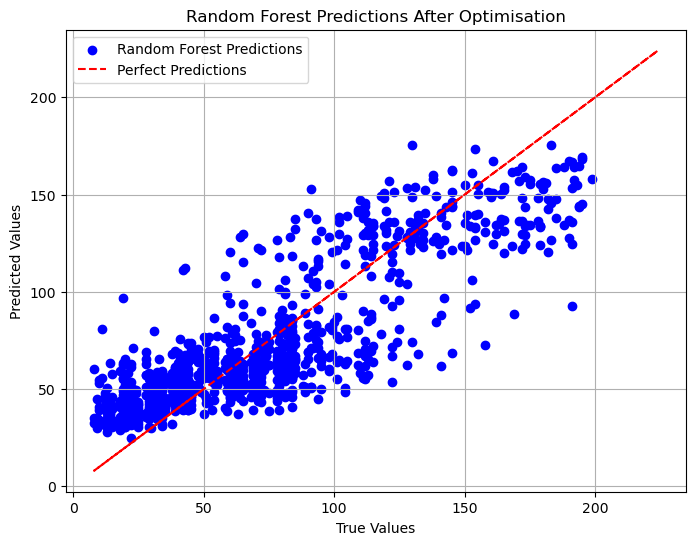

In [156]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_RF_opt, color='blue', label='Random Forest Predictions')

plt.plot(y, y, color='red', linestyle='--', label='Perfect Predictions')

plt.title('Random Forest Predictions After Optimisation')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In this case, it feels like the optimised model of the Random Forest Regressor seems worse than before the alteration, with datapoints being further from the real values of y. 

## NN and RFR Comparison

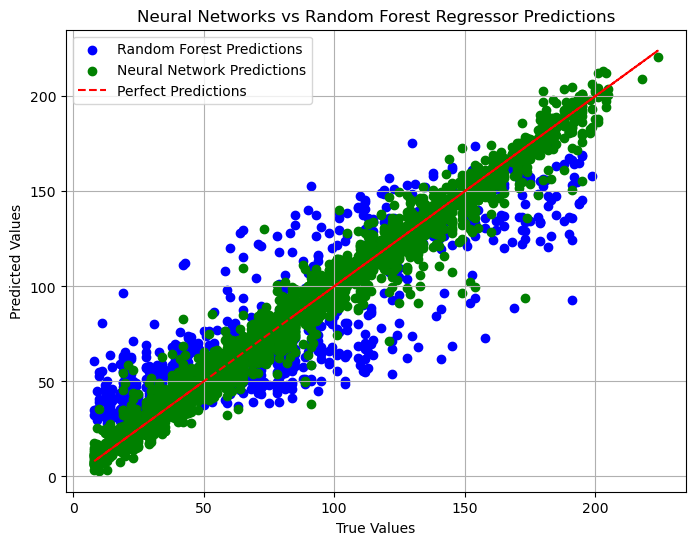

In [159]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_RF_opt, color='blue', label='Random Forest Predictions')
plt.scatter(y, y_pred_nn, color='green', label='Neural Network Predictions')

plt.plot(y, y, color='red', linestyle='--', label='Perfect Predictions')

plt.title('Neural Networks vs Random Forest Regressor Predictions')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

--------------------

# 2. Semantic Analysis

About the dataset:
- This dataset contains 80K music album reviews by the users of rateyourmusic.com.
- The dataset was acquired by scraping on May 2022.
- It contains 79922 album reviews and ratings (if available). (Bryant, 2022)

## 1.1. Data Understanding

In this phase we will:
- Load the dataset;
- See its shape;
- Basic infos;
- Check for Missing, null and NA values;

In [170]:
df2 = pd.read_csv("music_album_reviews.csv")

In [171]:
df2.head()

,Review,Rating
0,i think i actually under-rate ok computer if a...,5.0
1,i get why radiohead rub a lot of people the wr...,5.0
2,i would like to think i am good about not lett...,4.5
3,there are radiohead devotees like there were o...,4.0
4,i wrote a shining excellent review for this al...,5.0


In [172]:
df2.shape

(80271, 2)

In [173]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80271 entries, 0 to 80270
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  80245 non-null  object 
 1   Rating  78187 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB


In [174]:
df2.describe()

,Rating
count,78187.000000
mean,4.253258
std,0.871009
min,0.500000
25%,4.000000
50%,4.500000
75%,5.000000
max,5.000000


In [175]:
df2.isnull().sum()

Review      26
Rating    2084
dtype: int64

In [176]:
df2.nunique()

Review    79921
Rating       10
dtype: int64

In [177]:
df2.duplicated().sum()

237

In [178]:
df2.isna().sum()

Review      26
Rating    2084
dtype: int64

## 1.2 Data Preparation

Since there is no need to keep much of the size of the data, we can get rid of rows with NA values, duplicates and etc due to the size of this dataset and the minimum requirements asked for this task. Further data preparation is needed to get rid of unnecessary words, symbols and chars that could influence in the overall sentiment analysis of the 'Reviews' column.

As it can be seen above, there are duplicated, na and null values all over the dataset. We will drop these rows.

In [179]:
df2.drop_duplicates(inplace=True)

In [180]:
df2.duplicated().sum()

0

In [181]:
df2.fillna(np.nan, inplace=True)

In [182]:
df2.isna().sum()

Review       7
Rating    2080
dtype: int64

In [183]:
df2.dropna(inplace=True)

In [184]:
df2.isna().sum()

Review    0
Rating    0
dtype: int64

In [185]:
df2.shape

(77948, 2)

### Remove punctuation

When we do word count, symbols are accounted as words and classified as neutral - which does not represent the reality of the sentiments and causes a bigger count on the neutral side. So we will use a function to remove the punctuation and add a word_count variable.

In [186]:
def remove_punctuation(text):
    punctuation = re.compile(r'[^\w\s]')
    clear_text = punctuation.sub('', text)
    return clear_text

df2['Review'] = df2['Review'].apply(lambda x: remove_punctuation(x))

In [187]:
df2.head()

,Review,Rating
0,i think i actually underrate ok computer if an...,5.0
1,i get why radiohead rub a lot of people the wr...,5.0
2,i would like to think i am good about not lett...,4.5
3,there are radiohead devotees like there were o...,4.0
4,i wrote a shining excellent review for this al...,5.0


### Remove Stopwords

Stopwords according to Kavita Ganesan are "A set of commonly used words in a language. Examples of stop words in English are “a,” “the,” “is,” “are,” etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so widely used that they carry very little useful information." (Ganesan, 2019).

We need to remove them so their neutrality and lack of contect will not affect the overall results of the Sentiment Analysis.

In [188]:
def remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df2['Review'] = df2['Review'].apply(remove_stopwords)

### Word Count Addition

In [189]:
df2['Word_Count'] = df2['Review'].apply(lambda x: len(x.split()))

In [190]:
df2.head()

,Review,Rating,Word_Count
0,think actually underrate ok computer anything ...,5.0,241
1,get radiohead rub lot people wrong way lot peo...,5.0,512
2,would like think good letting wider critical w...,4.5,738
3,radiohead devotees like bowie devotees find un...,4.0,224
4,wrote shining excellent review album browser w...,5.0,430


## 2.3. Data Visualisation

In this section I have grouped 5 visualisations of the data:
- Count of Each Grade in Rating (Bar plot);
- The distribution of Rating Grades (Pie);
- The most popular words said in Reviews (Wordcloud);
- A pairplot of the numerical values;
- The Word Count on each Review (Scatterplot)

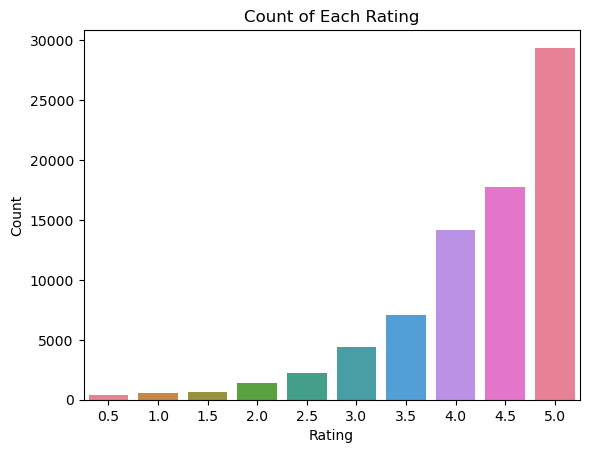

In [191]:
sns.countplot(x='Rating', hue='Rating', data=df2, palette='husl', legend=False)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Each Rating')
plt.show()

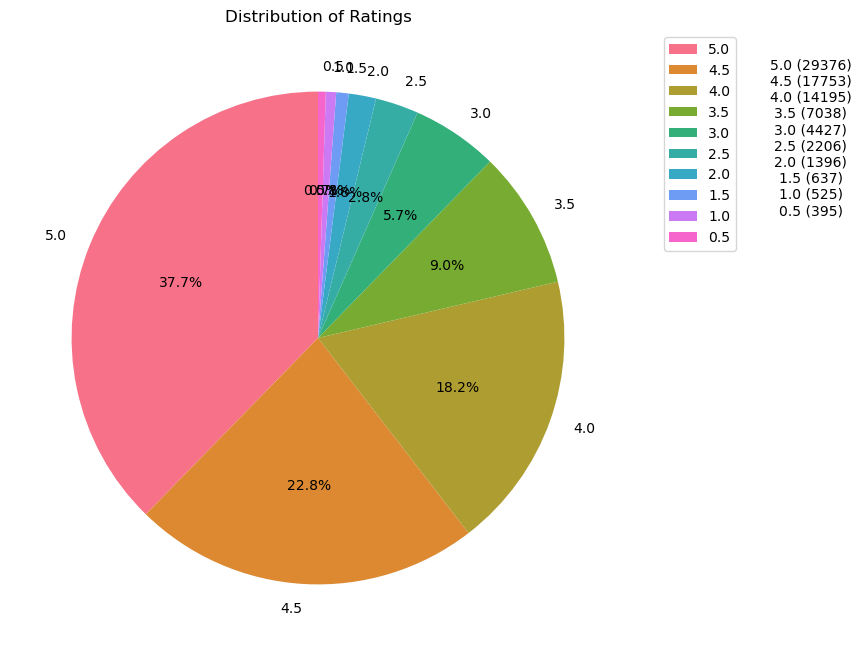

In [192]:
rating_counts = df2['Rating'].value_counts()

plt.figure(figsize=(8,8))
rating_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('husl', len(rating_counts)))
plt.ylabel('')
plt.title('Distribution of Ratings')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
percentages = [f'{value:.1f} ({count})' for value, count in zip(rating_counts.index, rating_counts)]
plt.text(2, 0.5, '\n'.join(percentages), horizontalalignment='center')
plt.show()

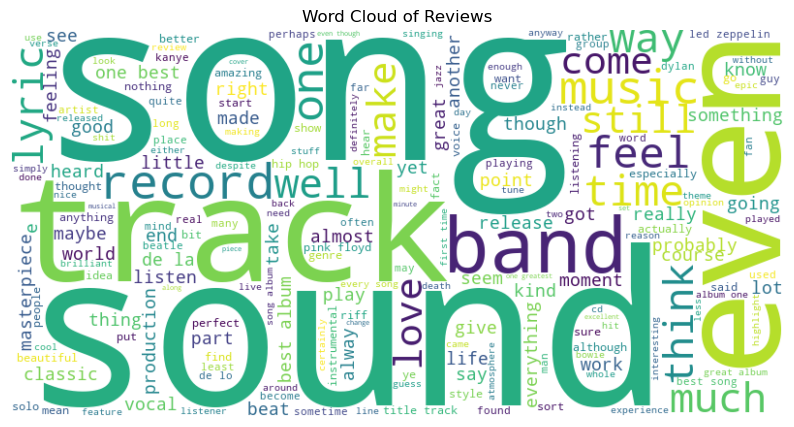

In [193]:
text = ' '.join(df2['Review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

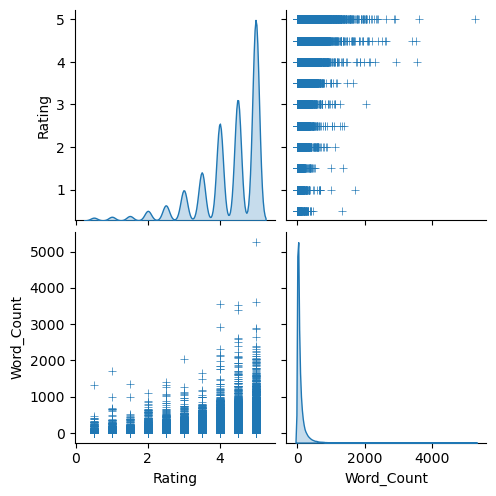

In [194]:
sns.pairplot(df2, diag_kind='kde', markers='+')

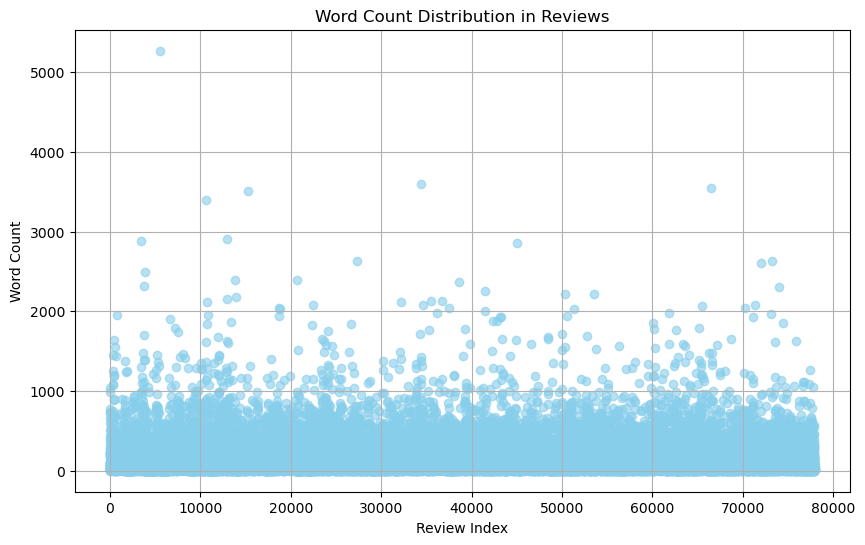

In [208]:
word_counts = df2['Word_Count']

plt.figure(figsize=(10, 6))
plt.scatter(range(len(word_counts)), word_counts, color='skyblue', alpha=0.6)
plt.title('Word Count Distribution in Reviews')
plt.xlabel('Review Index')
plt.ylabel('Word Count')
plt.grid(True)
plt.show()

In [210]:
average_word_count = df2['Word_Count'].mean()
average_word_count = round(average_word_count, 3)
print("The average review contains", average_word_count, "words.")

The average review contains 91.019 words.


Observation: I was surprised with the number of words used in some of the reviews. Some users had a lot to say about their favorite/or not so much albums.

## 2.4. Sentiment Analysis (with Visualisations)

In this topic we will analyse two points:
- The ratings given;
- The sentiment in the reviews written;

This dataset provided us with 2 initial columns: 'Rating' and 'Review'. In 'Rating' we have 10 possible values: 
- 0.5;
- 1.0;
- 1.5;
- 2.0;
- 2.5;
- 3.0;
- 3.5;
- 4.0;
- 4.5;
- 5.0;

As discussed in class, we need to define which values are positive, negative or neutral. To do so, we need to come with a convention: 3 is a neutral value, meanwhile above that value we have positive ratings and below negative ratings.

### Polarity Rating

Polarity of Ratings is a way to obtain an objective judgment of what a certain numerical rating represents in terms of sentiment. In here we classify if the rating given was positive, negative or neutral.

The value chosen as neutral was 3, with every rating above it being positive e everything below as negative.

In [195]:
df2["Polarity_Rating"] = df2["Rating"].apply(lambda x: "Positive" if x > 3 else ("Neutral" if x == 3 else "Negative"))

In [196]:
df2.head(30)

,Review,Rating,Word_Count,Polarity_Rating
0,think actually underrate ok computer anything ...,5.0,241,Positive
1,get radiohead rub lot people wrong way lot peo...,5.0,512,Positive
2,would like think good letting wider critical w...,4.5,738,Positive
3,radiohead devotees like bowie devotees find un...,4.0,224,Positive
4,wrote shining excellent review album browser w...,5.0,430,Positive
5,hurrah finally first radiohead experience year...,2.5,93,Negative
6,radiohead nigel godrich wytworzyli prawdziwie ...,5.0,26,Positive
7,let get straight bunch onehitwonder grunge cop...,2.5,86,Negative
8,sort understand praise album gets execution re...,2.0,68,Negative
9,see progressive rock elements record least sur...,2.0,172,Negative


With the Polarity Ratings added as a column to the dataset, we can plot it to analyse how much of it is positive, negative or neutral.

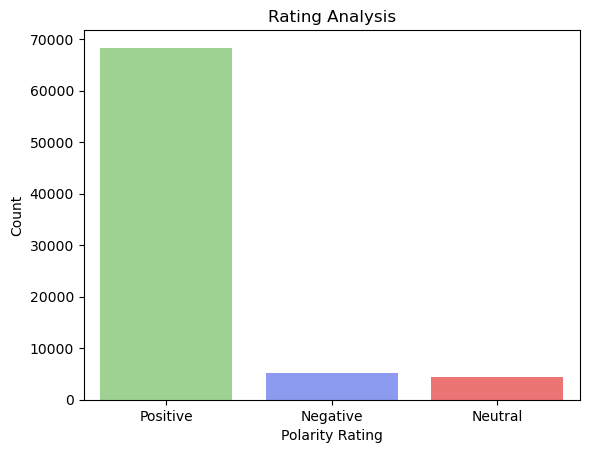

In [197]:
colors = ["#97DD88", "#7B8FFF","#FF6060"]
sns.countplot(x = "Polarity_Rating", hue="Polarity_Rating", data=df2, palette=colors)
plt.xlabel("Polarity Rating")
plt.ylabel("Count")
plt.title("Rating Analysis")
plt.show()

### Sentiment Score

Now for the proper sentiment analysis, we will observe another column: Review. It is an object column that contains multiple words (an average of 91 words per review). Here we will determine if the words used were positive, negative or neutral. This is different than just observing a rating, because users can be quite harsh when it comes to rating something, but can have also positive things to mention on their reviews, where they have the space to trully express their sentiments.

According to Microsoft, "While social media only gives a glance at how people talk about your brand online, sentiment analysis provides immediate knowledge of how the public perceives both your brand and product." (Microsoft, 2024). Even though we are not talking about branding and customer consuming a product and commenting about it, we could for example, as a band, observe what our fans mention about our album. Unfortunately the albuns reviewed on this dataset were not labelled, but for example, many users commented about Radiohead's new album - It would be good as a band/business to do such study.

Below we will have scores for the semantics used in the reviews.

In [198]:
df2["Sentiment_Score"] = df2["Review"].apply(lambda x:TextBlob(x).sentiment[0])

In [199]:
df2["Sentiment_Score"] = df2["Sentiment_Score"].apply(lambda x: "Positive" if  x > 0 else("Neutral" if x == 0 else "Negative"))

In [200]:
df2.head(30)

,Review,Rating,Word_Count,Polarity_Rating,Sentiment_Score
0,think actually underrate ok computer anything ...,5.0,241,Positive,Positive
1,get radiohead rub lot people wrong way lot peo...,5.0,512,Positive,Positive
2,would like think good letting wider critical w...,4.5,738,Positive,Positive
3,radiohead devotees like bowie devotees find un...,4.0,224,Positive,Positive
4,wrote shining excellent review album browser w...,5.0,430,Positive,Positive
5,hurrah finally first radiohead experience year...,2.5,93,Negative,Positive
6,radiohead nigel godrich wytworzyli prawdziwie ...,5.0,26,Positive,Neutral
7,let get straight bunch onehitwonder grunge cop...,2.5,86,Negative,Positive
8,sort understand praise album gets execution re...,2.0,68,Negative,Negative
9,see progressive rock elements record least sur...,2.0,172,Negative,Positive


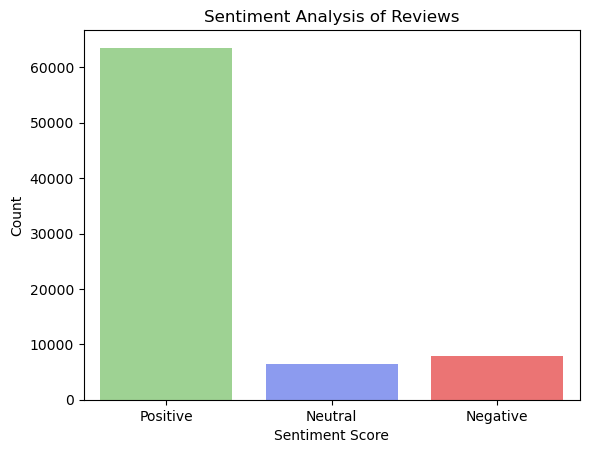

In [202]:
colors = ["#97DD88", "#7B8FFF","#FF6060"]
sns.countplot(x = "Sentiment_Score", hue="Sentiment_Score", data=df2, palette=colors)
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.title("Sentiment Analysis of Reviews")
plt.show()

## 2.5 Visualisations of Sentiment analysis



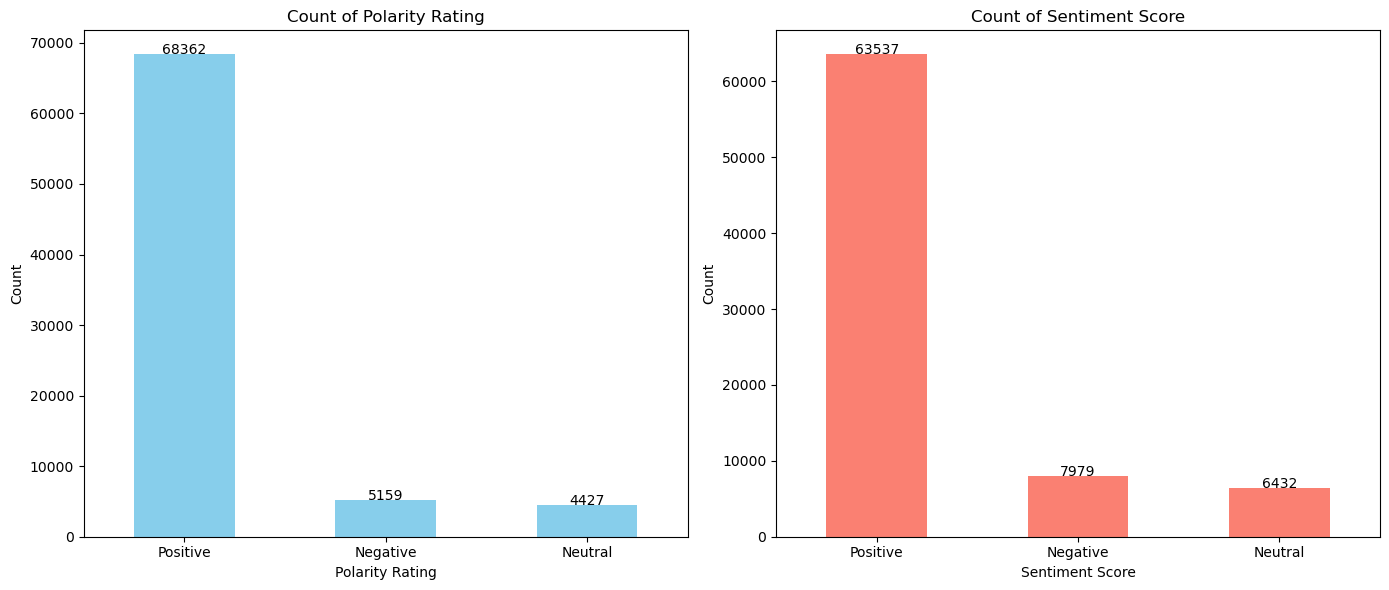

In [204]:
data_polarity = df2['Polarity_Rating'].value_counts()
data_sentiment = df2['Sentiment_Score'].value_counts()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
data_polarity.plot(kind='bar', color='skyblue')
plt.title('Count of Polarity Rating')
plt.xlabel('Polarity Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, v in enumerate(grouped_data_polarity):
    plt.text(i, v + 0.1, str(v), ha='center')

plt.subplot(1, 2, 2)
data_sentiment.plot(kind='bar', color='salmon')
plt.title('Count of Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, v in enumerate(grouped_data_sentiment):
    plt.text(i, v + 0.1, str(v), ha='center')

plt.tight_layout()
plt.show()